# Logistic Regression from Scratch

### Review: Linear Regression from Scratch

Note: This is the fundamental of deep learning.  Almost all deep learning operations is based on this weight multiplication.

Solving linear regression is an **optimization** problem. Optimization means finding the optimal - max, min.

$$\theta^* = \argmin_\theta J(\theta)$$

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = X \cdot \theta$$

2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        $$J(\theta) = \sum_{i=0}^m \frac{(\hat{y}_i - y_i)^2}{2}$$

    2.2 $$\frac{\partial J}{\partial \theta_j} = \sum_{i=0}^m (\hat{y}_i - y_i)x_j$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)
    

### Let's come back to Logistic Regression

Note: this is also the fundamental of all deep learning, that involves classification.   In deep learning, all operations do something like this....

Logistic Regression is a **classification** algorithm based on linear regression.

Classification - supervised learning - where $y$ is discrete.

Binary - class 0 and 1
Multiclass - > 2 class

Today we will be doing binary.....
This Thurs we will be doing multiclass....

#### Four steps:

1.  Predict - `X.shape = (m, n); y.shape = (m, )`
    $$ h(\theta) = y = f(x) = X \cdot \theta$$

    We know that $\texttt{range}(X \cdot \theta) =  (-\infty, \infty)$

    We need to find a function $g(x)$ such that it maps infinity to 0 and 1.

    That $g(x) = \displaystyle\frac{1}{1 + e^{-x}}$

    So if you combine $g(x)$ with $h(\theta)$, then you will get
    
    $h(g(x)) = \displaystyle\frac{1}{1 + e^{-(X \cdot \theta)}}$


2.  Find the gradient
   
    2.1 We must first define the $J(\theta)$
        $$J(\theta) = \sum_{i=0}^m \frac{(\hat{y}_i - y_i)^2}{2}$$

    2.2 $$\frac{\partial J}{\partial \theta_j} = \sum_{i=0}^m (\hat{y}_i - y_i)x_j$$

3. Update the theta 

    $$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta_j}$$

4. Repeat 1, 2, 3 until either (1) `num_epochs` reach limit, or (2) early stopping (which I asked you to implement in your assignment)

### Let's code

In [4]:
import numpy as np
import matplotlib.pyplot as plt

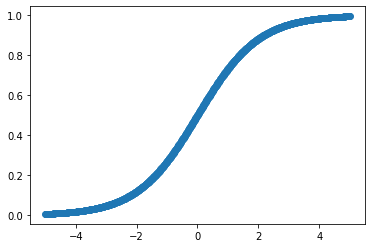

In [7]:
#1. I want you to define this function g(x)
def sigmoid(x):  #logit function, or sigmoid function
    return (1 + np.exp(-x)) ** -1

#2. I want you to simulate x from -5 to 5
x = np.linspace(-5, 5, 1000)  #np.arange(-5, 5, 0.01)
y = sigmoid(x)

#3. Try to plot it
plt.scatter(x, y)


In [16]:
#1. define X with two samples.  
# Sample 1 has egg price = 5, oil price = 10; Sample 2 has egg price = 3, oil price = 4
X = np.array([[5, 10], [3, 4], [9, 1]])
X.shape

#2. define any theta you like
theta = np.random.random((2, ))  #np.ones((X.shape[1], ))
theta.shape

#3. perform X dot theta  #(3, 2) @ (2, ) = (3, )
    #print it
yhat = X.dot(theta)
yhat.shape
    
#4. perform sigmoid on top and see whether the value is really 0 or 1
yhat_sig = sigmoid(yhat)

#5. perform a round to nearest
print(np.round(yhat_sig))

[1. 1. 1.]
